In [2]:
import matplotlib.pyplot as plt 
from numpy import zeros

In [3]:
iterations = int(input("Iterations count: ")) #Choose iterations count (N-1 lub)
xtot = 365 #days 
h = xtot/iterations #euler step (days/iterations)
state1 = str(input("Do you wish to have default settings? ([Y]es/[N]o)")) #settings
if state1 == "Y":
    beta = 45*1/100
    alfa = 1/10*0.34
    gamma = 1/10**4
    print("Spread rate: ", beta)
    print("Recovery of infected rate: ", alfa)
    print("Vaccination of susceptible rate: ", gamma)
if state1 == "N":
    beta = float(input("Infection rate:"))
    alf = float(input("Recovery of infected rate:"))
    gam = float(input("Quarantine of susceptible rate (relevant for SIR):"))
CC = 1
print("The Euler steps have the size of:", h)
Time = list(i*h for i in range(0,iterations)) #time grid
CityL = ["Ctesiphon", "Constantinople", "Somethingcity"] #city list

Iterations count: 12000
Do you wish to have default settings? ([Y]es/[N]o)Y
Spread rate:  0.45
Recovery of infected rate:  0.034
Vaccination of susceptible rate:  0.0001
The Euler steps have the size of: 0.030416666666666668


In [4]:
h = xtot/iterations 


def SIS(y):
    S,I = y
    N = S + I
    DSdt = -beta*S*I/N + alfa*I
    DIdt = beta*S*I/N - alfa*I
    return DSdt, DIdt



def SIR(y):
    S1,I1,R1 = y
    N1 = S1 + I1 + R1
    DS1 = -beta*S1*I1/N1 - gamma*S1 
    DI1 = beta*S1*I1/N1 - alfa*I1 
    DR1 =  gamma*S1 + alfa*I1 
    
    return DS1, DI1, DR1


def SIRL2(y):
    beta2 = beta - 0.2
    S1,I1,R1, S2, I2, R2 = y
    N1 = S1 + I1 + R1 
    N2 = S2 + I2 + R2
    
    DS1 = -beta*S1*I1/N1 - gamma*S1  - ( 0.5*S1 - 0.3*S2 )
    DI1 = beta*S1*I1/N1 - alfa*I1  - (0.5*I1 - 0.3*I2)
    DR1 =  gamma*S1 + alfa*I1 - (0.5*R1 - 0.3*R2)

    DS2 = -beta2*S2*I2/N2 - gamma*S2  + ( 0.5*S1 - 0.3*S2 )
    DI2 = beta2*S2*I2/N2 - alfa*I2  + (0.5*I1 - 0.3*I2)
    DR2 =  gamma*S2 + alfa*I2 + (0.5*R1 - 0.3*R2)
    
    return DS1, DI1, DR1, DS2, DI2, DR2

def Euler(ini,f):
    y = tuple(ini)
    K = len(f(y))
    Info = zeros((K,iterations))
    for k in range(iterations):
        for j in range(K*CC):
            Info[j][k] = y[j]
        y = tuple(y[l] + h*f(y)[l] for l in range(len(y)))
    return Info


def Euler2(ini,f):
    y = tuple(ini)
    K = len(f(y))
    Info2 = zeros((K,iterations*2))
    for k in range(iterations*2):
        for j in range(K*CC):
            Info2[j][k] = y[j]
        y = tuple(y[l] + h/2*f(y)[l] for l in range(len(y)))
    return Info2 

def Heun(ini,f):
    y = tuple(ini)
    K = len(f(y))
    Info = zeros((K,iterations))
    for k in range(iterations):
        for j in range(K):
            Info[j][k] = y[j]
        yp = tuple(y[l] + h*f(y)[l] for l in range(len(y)))
        y = tuple(y[l] + h/2*(f(y)[l] + f(yp)[l]) for l in range(len(y)))
    return Info



def RuKu(ini,f):
    y = tuple(ini)
    K = len(f(y))
    Info = zeros((K,iterations))
    for k in range(iterations):
        for j in range(K):
            Info[j][k] = y[j]
        k1 = tuple(f(y)[l] for l in range(len(y)))
        yp1 = tuple(y[l] + h/2*k1[l] for l in range(len(y)))
        
        k2 = tuple(f(yp1)[l] for l in range(len(y)))
        yp2 = tuple(y[l] + h/2*k2[l] for l in range(len(y)))
        
        k3 = tuple(f(yp2)[l] for l in range(len(y)))
        yp3 = tuple(y[l] + h*k3[l] for l in range(len(y)))
        
        k4 = tuple(f(yp3)[l] for l in range(len(y)))
        
        
        y = tuple(y[l] + h/6*(k1[l] + 2*(k2[l] + k3[l]) + k4[l]) for l in range(len(y)))
    return Info


def Error(ini,f):
    Q = Euler(tuple(ini),f)
    W = RuKu(tuple(ini),f)
    Delta = zeros((len(tuple(ini)), iterations))
    for j in range(len(Delta)):
        for k in range(len(Delta[0])):
            Delta[j][k] = abs(Q[j][k] - W[j][k])
    return Delta

def Error2(ini,f):
    Q = Euler(tuple(ini),f)
    W = Euler2(tuple(ini),f)
    Aqa = zeros((len(tuple(ini)), iterations))
    for j in range(len(Aqa)):
        for k in range(len(Aqa[0])):
            Aqa[j][k] = abs(Q[j][k] - W[j][2*k])
    return Aqa
 

Which simulation do you want? (SIS [SIS],SIR (Lecture Notes) [SIR], SIR [SIROG], SIR 2 cities [SIR2], SIR 2 cities (Lecture Notes) [SIRL2])SIS
Ok.
Default initial? [Y/N]Y
[R]unge-[K]utta,[H]eun or [E]uler method?E
Ratio infected:  0.9244444444444384
expected ratio:  0.9244444444444444
Done


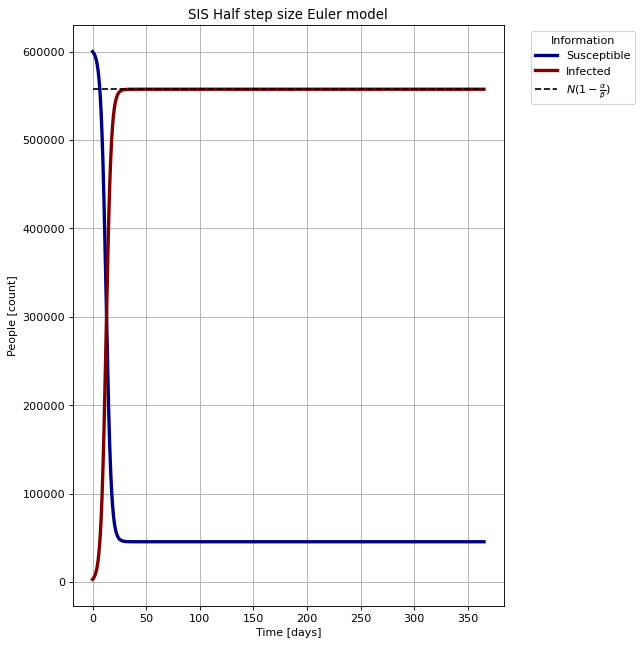

In [5]:
plt.figure(figsize=(8,8), dpi = 80)

plotconfig = str(input("Which simulation do you want? (SIS [SIS],SIR [SIR], SIR 2 cities [SIRL2])"))
states = ["Susceptible", "Infected", "Recovered"]
colours = ["navy", "maroon", "limegreen"]
print("Ok.")
if plotconfig == "SIS":
    CC = 1
    st = input("Default initial? [Y/N]")
    if st == "Y":
        ini = 600000,3000
    else:
        SU = int(input("Initial susceptible:"))
        IU = int(input("Initial infected:"))
        ini = SU, IU
    equ = input("[R]unge-[K]utta,[H]eun or [E]uler method? [E]rror [E]stimate, [E]rror [E]stimate 1/[2] step compared?")
    if equ == "RK":
        A = RuKu(ini, SIS)
    if equ == "H":
        A = Heun(ini,SIS)
    if equ == "E":
        A = Euler(ini, SIS)
    if equ == "EE":
        A = Error(ini, SIS)
    if equ == "EE2":
        A = Error2(ini, SIS)
    for j in range(2):
        plt.plot(Time, A[j], color = colours[j], linewidth = 3, label = states[j])
    plt.plot([Time[0], Time[-1]], [(600000+3000)*(1 - alfa/beta), (600000+3000)*(1 - alfa/beta)], "--", color = "black", label = r"$N(1-\frac{\alpha}{\beta})$")
    plt.title(plotconfig + " Half step size Euler model")
    if equ == "EE" or equ == "EE2":
        pass
    else:
        print("Ratio infected: ", float(A[1][-1]/(A[1][0] + A[0][0])))
        print("expected ratio: ", 1-alfa/beta)
    print("Done")

        
if plotconfig == "SIR":
    CC = 1
    st = input("Default initial? [Y/N]")
    if st == "Y":
        ini = 600000,3000,0
    else:
        SU = int(input("Initial susceptible:"))
        IU = int(input("Initial infected:"))
        RU = int(input("Initial recovered:"))
        ini = SU, IU, RU
    equ = input("[R]unge-[K]utta,[H]eun or [E]uler method? [E]rror [E]stimate, [E]rror [E]stimate 1/[2] step compared?")
    if equ == "RK":
        A = RuKu(ini, SIR)
    if equ == "H":
        A = Heun(ini,SIR)
    if equ == "E":
        A = Euler(ini, SIR)
    if equ == "EE":
        A = Error(ini, SIR)
    if equ == "EE2":
        A = Error2(ini, SIR)
    for j in range(3):
        plt.plot(Time, A[j], color = colours[j], linewidth = 3, label = states[j])
    plt.title(plotconfig + " RK vs Euler model")

    

if plotconfig == "SIRL2":
    CC = 1
    st = input("Default initial? [Y/N]")
    if st == "Y":
        ini = 600000,3000,0,300000,0,0
    else:
        print("In " + CityL[0])
        SU = int(input("Initial susceptible:"))
        IU = int(input("Initial infected:"))
        RU = int(input("Initial recovered:"))
        print("In " + CityL[1])
        SU2 = int(input("Initial susceptible:"))
        IU2 = int(input("Initial infected:"))
        RU2 = int(input("Initial recovered:"))
        ini = SU, IU, RU, SU2, IU2, RU2
    equ = input("[R]unge-[K]utta,[H]eun or [E]uler method? [E]rror [E]stimate, [E]rror [E]stimate 1/[2] step compared?")
    if equ == "RK":
        A = RuKu(ini, SIRL2)
    if equ == "H":
        A = Heun(ini,SIRL2)
    if equ == "E":
        A = Euler(ini, SIRL2)
    if equ == "EE":
        A = Error(ini, SIRL2)
    if equ == "EE2":
        A = Error2(ini, SIRL2)
    Cq = int(input("Plot which city? (0,1,2), 2 is both."))
    if Cq == 0: 
        for j in range(3):
            labelstr = states[j] + " in " + CityL[Cq] 
            plt.plot(Time, A[j], color = colours[j], linewidth = 3, label = labelstr)
    if Cq == 1:
        for j in range(3):
            labelstr = states[j] + " in " + CityL[Cq] 
            plt.plot(Time, A[j], color = colours[j], linewidth = 3, label = labelstr)
    plt.title("SIR model, allowed travel, equation from epidemists, in " + CityL[Cq])   
    if Cq == 2:
        for j in range(3):
            labelstr = states[j] + " in " + CityL[0] 
            plt.plot(Time, A[j], color = colours[j], linewidth = 3, label = labelstr)
        for j in range(3):
            labelstr = states[j] + " in " + CityL[1] 
            plt.plot(Time, A[j+3], "--", color = colours[j], linewidth = 3, label = labelstr) 
    plt.title("SIR, allowed travel, in " + CityL[0] + " and " + CityL[1] + " Half step size Euler model")

plt.legend(title = "Information", bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.tight_layout()

plt.xlabel("Time [days]")
plt.ylabel("People [count]")
plt.show()
